# Layerwise decoders

These decoders 'straddle' the layers that they decode: randomizing the CLS tokens, passing them through the layer, and decoding the outputs

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns

import numpy as np
import pandas as pd

from tqdm import tqdm

import torch

## Train the straddle models 

In [2]:
from src.model.setup import image_model_setup
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis, _, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis.to('mps')

W0201 20:53:07.289000 5371 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
from src.initialization.activity_dataset import OnlineLayerInputDataset
from src.model.CLS_token_probing import ModuleSpecificDecoder
from src.train.middle_decoders import train_module_decoder


In [4]:
i = 10
layer_name = f'dinov2.encoder.layer.{i}'

ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')

probe = ModuleSpecificDecoder()
base_module = model_analysis.module_dict[layer_name]

model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
model_out.save_pretrained(f'layer{i}_probe')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.707


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.044 >= min_delta = 0.0. New best score: 0.752


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.015 >= min_delta = 0.0. New best score: 0.766
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅████████████
lr-Adam,████████▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
train/loss,█▃▃▃▃▂▃▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇█████
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,0.62412
trainer/global_step,9374
val/accuracy,0.76606


In [4]:
for i in [8, 9, 11]:
    layer_name = f'dinov2.encoder.layer.{i}'
    
    ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
    ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')
    
    probe = ModuleSpecificDecoder.from_pretrained('layer10_probe')
    base_module = model_analysis.module_dict[layer_name]
    
    model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
    model_out.save_pretrained(f'layer{i}_probe')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory


wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.538


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.062 >= min_delta = 0.0. New best score: 0.600


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.017 >= min_delta = 0.0. New best score: 0.617
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅████████████
lr-Adam,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁
train/loss,█▇▆▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▂▂▂▁▂
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇██
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,1.22883
trainer/global_step,9374
val/accuracy,0.61706


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.617


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.050 >= min_delta = 0.0. New best score: 0.667


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.015 >= min_delta = 0.0. New best score: 0.682
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅███████████████
lr-Adam,██████████▇▇▇▇▇▇▇▆▆▆▅▅▅▄▄▄▄▄▄▃▂▂▂▂▁▁▁▁▁▁
train/loss,█▇▅▅▄▄▃▃▃▄▃▃▃▃▃▂▂▃▂▂▁▂▂▁▂▂▂▁▁▂▁▂▁▁▂▂▁▂▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇█
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,1.01511
trainer/global_step,9374
val/accuracy,0.68186


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.786


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.021 >= min_delta = 0.0. New best score: 0.807


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.010 >= min_delta = 0.0. New best score: 0.818
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅███████████
lr-Adam,█████▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
train/loss,█▅▄▇▇▅▆▄▅▃▃▃▅▄▃▂▅▄▂▂▂▂▂▃▃▂▃▂▂▁▂▂▁▂▂▂▂▁▁▁
trainer/global_step,▁▁▂▂▂▃▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██████
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,0.32423
trainer/global_step,9374
val/accuracy,0.81768


Overall impressions on the validation accuracy
1. The accuracies are quite impressive. Substantially better than the shuffled accuracies previously. This includes the final layer: progressive read-outs on the CLS token don't appear to ever be necessary. Accuracies: ~82%, 77%, 68%, 62% (vs 75%, 60%, 50%, 40% for the previous probe readouts, fairly consistently across different models.)

2. There were still improvements (~1-3%) happening on epoch 3. We could certainly train longer to squeeze out even better performance.

##  Testing the straddle models

Notes / observations:
1. In one case layers 8 and 10 are correct and the other two are wrong. Does this happen a lot or is it mistaken randomization?

2. There is some noise in the outputs, as we would expect from the token randomization. ~90% consistency.

In [2]:
from src.model.setup import image_model_setup
from src.model.CLS_token_probing import ModuleSpecificDecoder
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
_=model.model.eval()

W0203 17:42:53.781000 31035 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
readouts = {}
results_val = {'label': []}
results_test = {'label': []}

for i in range(8, 12):
    layer_name = f'dinov2.encoder.layer.{i}'
    probe = ModuleSpecificDecoder.from_pretrained(f'layer{i}_probe')
    probe.eval()

    readouts[layer_name] = probe
    results_val[layer_name] = []
    results_test[layer_name] = []

hooks = model.add_internal_readouts(readouts)

Loading weights from local directory
Loading weights from local directory
Loading weights from local directory
Loading weights from local directory


In [4]:
dl_val = torch.utils.data.DataLoader(image_datasets['validation'], batch_size=64)
dl_test = torch.utils.data.DataLoader(image_datasets['test'], batch_size=64)

In [5]:
def merge_into_storage(storage, batch_outs):
    for name in storage.keys():
        storage[name].append(batch_outs[name])

model.to('mps')

for batch in tqdm(dl_val, total = 50000 / 64):
    _ = model.model( batch['input'].to('mps'))
    outs = model.get_batch_readout()
    outs['label'] = batch['label']
    merge_into_storage(results_val, outs)

for batch in tqdm(dl_test, total = 50000 / 64):
    _ = model.model( batch['input'].to('mps'))
    outs = model.get_batch_readout()
    outs['label'] = batch['label']
    merge_into_storage(results_test, outs)


782it [10:40,  1.22it/s]                                                        
782it [10:56,  1.19it/s]                                                        


In [6]:
for key in results_val.keys():
    results_val[key] = torch.concat(results_val[key]).cpu()

In [7]:
for key in results_test.keys():
    results_test[key] = torch.concat(results_test[key]).cpu()

In [8]:
layers = [f'dinov2.encoder.layer.{i}' for i in range(8, 12)]
val_acc = []
test_acc = []

for layer in layers:
    val_acc.append((results_val[layer].argmax(1).cpu() == results_val['label']).float().mean() )
    test_acc.append((results_test[layer].argmax(1).cpu() == results_test['label']).float().mean() )



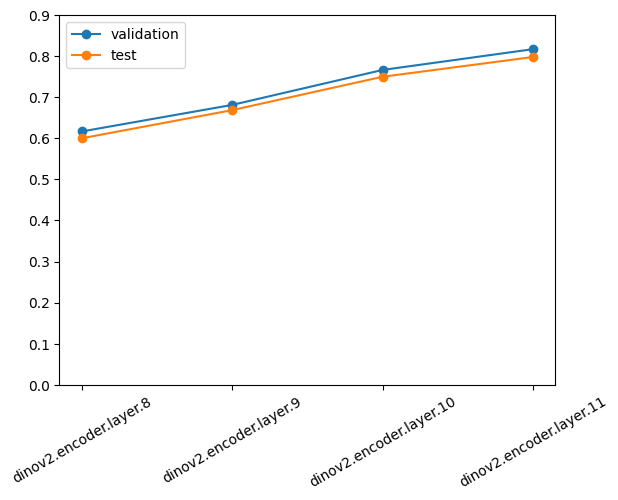

In [9]:
plt.plot(layers, val_acc, '-o', label='validation')
plt.plot(layers, test_acc, '-o', label='test')
plt.ylim([0, 0.9])
plt.legend()
_=plt.xticks(rotation=30)

This looks quite good. Performs very well compared to the linear probing

Worth noting:
- test performance is consistently worse that validation performance, since the validation was never really used for anything during training except monitoring. (Early stopping never kicked in, because the improvement was continuous.)

- I suspect that this is the result of distribution shift between the underlying train and validation splits (discussed here: https://iclr-blogposts.github.io/2025/blog/imagenet-flaws/) but worth keeping in mind for the future.


In [57]:
import torch.nn.functional as F

def rowwise_entropy(logits, dim=1):
    # Convert logits to probabilities
    probs = F.softmax(logits, dim=dim)
    # Calculate log probabilities, use torch.clamp to avoid log(0)
    log_probs = torch.log(probs + 1e-10)
    # Calculate entropy
    entropy = -torch.sum(probs * log_probs, dim=dim)
    return entropy

In [75]:
val_entropies = []
for layer in results_val.keys():
    if layer == 'label':
        continue
    val_entropies.append(pd.DataFrame({'entropy': rowwise_entropy(results_val[layer]),
                                       'layer': layer }))

val_entropies = pd.concat(val_entropies)


test_entropies = []
for layer in results_test.keys():
    if layer == 'label':
        continue
    test_entropies.append(pd.DataFrame({'entropy': rowwise_entropy(results_test[layer]),
                                       'layer': layer }))

test_entropies = pd.concat(test_entropies)


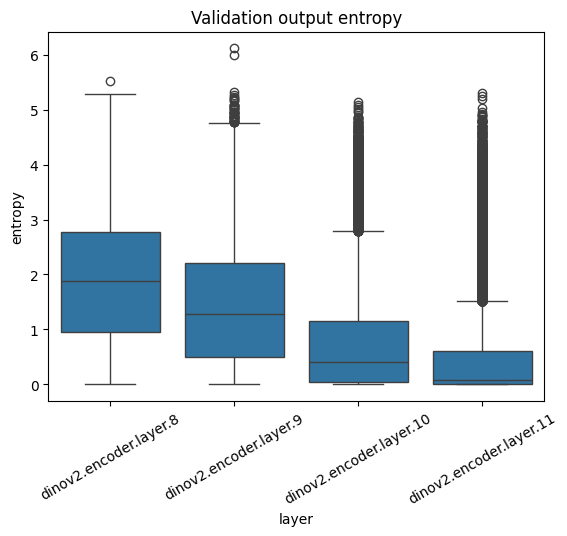

In [113]:
sns.boxplot(val_entropies, x='layer', y='entropy')
plt.title('Validation output entropy')
_=plt.xticks(rotation=30)

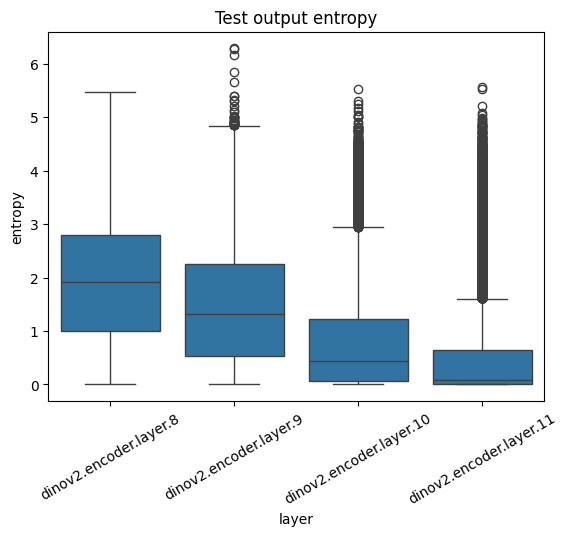

In [114]:
sns.boxplot(test_entropies, x='layer', y='entropy')
plt.title('Test output entropy')
_=plt.xticks(rotation=30)

Text(0.5, 1.0, 'test vs validation entropy')

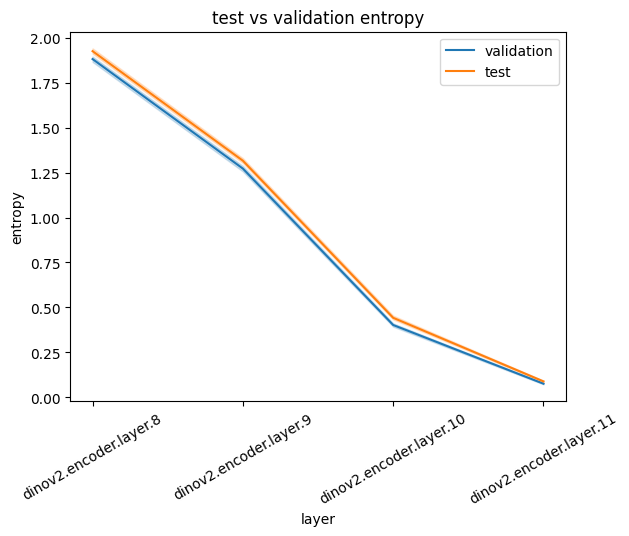

In [120]:
pi = 50
sns.lineplot(val_entropies, x='layer', y='entropy', estimator='median', label='validation')
sns.lineplot(test_entropies, x='layer', y='entropy', estimator='median', label='test')
plt.legend()
_=plt.xticks(rotation=30)
plt.title(f'test vs validation entropy')


The entropy decreases on in median (also on average) over the layers, but there is still supstantial overlap between the layers. Each ranges from almost 0 to almost maximum (~6.9) entropy. Test entropy (mean and median) is slightly higher than validation, as we would hope.

#### This is at whole population scale. What about within individual runs?

### Combining model outputs:

For this section, I'll only use the validation set, to keep the test set around for later testing.

#### Can I squeeze out more performance just by averaging?

In [145]:
total = sum([value if key != 'label' else 0 for key, value in results_val.items()])

In [148]:
(total.argmax(1) == results_val['label']).float().mean()

tensor(0.8177)

In [150]:
(results_val[f'dinov2.encoder.layer.11'].argmax(1) == results_val['label']).float().mean()

tensor(0.8174)

Maybe we can squeeze out a drop more performance by averaging the predictions.

In [152]:
avg_results = (total.argmax(1) == results_val['label'])
last_results = (results_val[f'dinov2.encoder.layer.11'].argmax(1) == results_val['label']) 

In [158]:
(avg_results & (~last_results)).sum()

tensor(1953)

In [159]:
(last_results & (~avg_results)).sum()

tensor(1938)

The 'flips' are balanced, with a __very slight__ preference toward flipping correct...

#### Naive weighting by accuracy:

In [163]:
results_list = [results_val[f'dinov2.encoder.layer.{i}'] for i in range(8, 12)]

In [171]:
weighted_mean = sum([val_acc[i] * results_list[i] for i in range(4)])

In [172]:
(weighted_mean.argmax(1) == results_val['label']).float().mean()

tensor(0.8208)

In [173]:
weighted_results = (weighted_mean.argmax(1) == results_val['label'])

In [174]:
(weighted_results & (~last_results)).sum()

tensor(1914)

In [175]:
(last_results & (~weighted_results)).sum()

tensor(1743)

Less corrections to the final outputs, but a higher ratio of correct corrections.

#### Majority vote

In [206]:
best_found = [results_val[f'dinov2.encoder.layer.{i}'].argmax(1) for i in range(8, 12)]
best_found = torch.stack(best_found)

In [207]:
(torch.mode(best_found, dim=0).values == results_val['label']).float().mean()

tensor(0.7828)

Decreased accuracy. I think that this over-weights the un-reliable classifiers.

__Another question:__ how often is the right answer in _one_ of the the outputs?

In [212]:
(best_found == results_val['label']).any(0).float().mean()

tensor(0.8872)

88% of the time, at least one of the outputs has the right answer. Note that this is not even an upper bound, since there could also be multiple wrong answers that out-weigh a right answer.

## What if we just train to decode multiple layers at once?

Notes:
1. I've run a couple of different initializations of this training, with quite variable initial learning curves. Some struggle to pick up any signal at all in the first couple hundred steps.

In [2]:
from src.model.setup import image_model_setup
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)

W0203 14:13:50.437000 26504 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
from src.initialization.activity_dataset import OnlineLayerInputDataset
from src.model.CLS_token_probing import MultiModuleDecoder
from src.train.middle_decoders import train_module_decoder

In [4]:
layers = [ f'dinov2.encoder.layer.{i}' for i in range(8, 12)]

ds_train = OnlineLayerInputDataset(model, layers, image_datasets['train'], device='mps')
ds_validation = OnlineLayerInputDataset(model, layers, image_datasets['validation'], device='mps')

decoder = MultiModuleDecoder(4)

modules = {layer_name: model.module_dict[layer_name] for layer_name in layers}

model_out = train_module_decoder(decoder, modules, ds_train, ds_validation, max_epochs=5)
model_out.save_pretrained(f'joint_decoder')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



  | Name    | Type               | Params | Mode 
-------------------------------------------------------
0 | decoder | MultiModuleDecoder | 27.2 M | train
-------------------------------------------------------
27.2 M    Trainable params
0         Non-trainable params
27.2 M    Total params
108.872   Total estimated model params size (MB)
58        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.738


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.057 >= min_delta = 0.0. New best score: 0.794


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.019 >= min_delta = 0.0. New best score: 0.814

Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

Killed after three epochs: the LR scheduler was starting to come back up. Generally, I think that this scheduling is not agressive enough.

The resulting output __did not__ produce accuracies that beat last layer decoding (they were comparable).

That said, even if this had produced an improvement, what would be the point?
1. The argument that this is a good way to readout ViT results from the neural network results would have been strengthened.
2. However, this wouldn't show that the multiple readouts are capturing independent information, as could be achieved by compositing their readouts. Would that even show such a thing?
   - It shows that _these particular_ readouts are capturing different information. However, it does not show that the information is not available in the layers. In particular if better model / training is used to extract it.


Top reported accuracy for Dinov2 base is given as 84.3% on google for probes. This shows that we have a lot of distance to make up before we can achieve state-of-the-art, not really worth it.

Steps to pursue this:
1. Use full imagenet training set.